In [49]:
#add your code 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd 
df = pd.read_csv('/content/dataset2.csv')

In [51]:
 pip install transformers

     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 45.8 MB/s 
     |████████████████████████████████| 895 kB 53.0 MB/s 
     |████████████████████████████████| 67 kB 3.4 MB/s 
     |████████████████████████████████| 596 kB 35.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [52]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [54]:
df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [55]:
# Reduce logging output.
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(df.Text.values)

In [56]:
message_embeddings

<tf.Tensor: shape=(5791, 512), dtype=float32, numpy=
array([[ 0.00187789, -0.05801634,  0.00017791, ...,  0.01538131,
        -0.02368098, -0.07052743],
       [-0.03763047, -0.07625879, -0.01181609, ...,  0.03249416,
         0.08517423, -0.06524866],
       [-0.02788837, -0.07470455,  0.00689527, ...,  0.06495167,
         0.07790571, -0.00333643],
       ...,
       [-0.00755364, -0.04434144,  0.05665129, ..., -0.01965691,
        -0.05793207, -0.06088739],
       [-0.06525112, -0.05040118, -0.00916259, ..., -0.05744504,
        -0.06329279, -0.04189469],
       [-0.06366073, -0.08128533,  0.03497606, ..., -0.06160396,
        -0.05936261, -0.02971333]], dtype=float32)>

In [57]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(message_embeddings)
clusters = km.labels_.tolist()

In [58]:
from sklearn.decomposition import PCA
import numpy as np


data = message_embeddings
pca = PCA(10)
 
#Transform the data
df_new = pca.fit_transform(data)

In [59]:
#Initialize the class object
kmeans = KMeans(n_clusters=3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df_new)
 
#Getting unique labels
u_labels = np.unique(label)
 
labels = kmeans.labels_

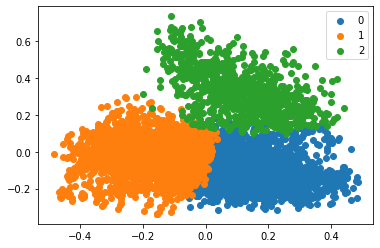

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plotting the results:
for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()